In [1]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import copy
from abc import ABC, abstractmethod

## Initialize a Tic-Tac-Toe Game

In [2]:
# step1: set up the environment
class TicTacToe:
    def __init__(self):
        self.board = [' ' for _ in range(9)]
        self.current_winner = None

    def print_board(self):
        # Print the board
        for row in [self.board[i*3:(i+1)*3] for i in range(3)]:
            print('| ' + ' | '.join(row) + ' |')

    def available_moves(self):
        # print out the index of the available moves from 0 to 8
        return [i for i, x in enumerate(self.board) if x == ' ']

    def make_move(self, square, letter):
        if self.board[square] == ' ':
            self.board[square] = letter # make the move
            if self.winner(square, letter): # check if the move is a winning move
                self.current_winner = letter # update the winner   
            return True # return True if the move is valid
        return False # return False if the move is invalid

    def winner(self, square, letter):
        # Check the row
        row_ind = square // 3 # first row is 0, second row is 1, third row is 2
        row = self.board[row_ind*3:(row_ind+1)*3] # get the row, e.g. [0, 1, 2], [3, 4, 5], [6, 7, 8]
        if all([s == letter for s in row]):
            return True

        # Check the column
        col_ind = square % 3 # first column is 0, second column is 1, third column is 2
        column = [self.board[col_ind+i*3] for i in range(3)] # get the column, e.g. [0, 3, 6], [1, 4, 7], [2, 5, 8]
        if all([s == letter for s in column]):
            return True

        # Check diagonals
        if square % 2 == 0: # check 0 4 8 or 2 4 6
            diagonal1 = [self.board[i] for i in [0, 4, 8]]
            if all([s == letter for s in diagonal1]):
                return True
            diagonal2 = [self.board[i] for i in [2, 4, 6]]
            if all([s == letter for s in diagonal2]):
                return True
        return False

    def gameover(self):
    # Check if either 'X' or 'O' has won
        return any(self.winner(square, letter) for square in range(9) for letter in ['X', 'O']) or self.tie()

    def tie(self):
        # all the spaces are filled
        return all([s != ' ' for s in self.board])

    def reset(self):
        self.board = [' ' for _ in range(9)]
        self.current_winner = None

class Player(ABC):
    def __init__(self, letter):
        self.letter = letter

    @abstractmethod
    def choose_action(self, game):
        pass
    @abstractmethod
    def __str__(self) -> str:
        pass
    @abstractmethod
    def __repr__(self) -> str:
        pass


### Demonstration of game

In [3]:
## demonstration of a game
game = TicTacToe()
game.print_board()

|   |   |   |
|   |   |   |
|   |   |   |


In [4]:
game.make_move(0, 'X')
game.print_board()
game.gameover()

| X |   |   |
|   |   |   |
|   |   |   |


False

In [5]:
game.make_move(1, 'O')
game.make_move(2, 'X')
game.make_move(3, 'O')
game.make_move(4, 'X')
game.make_move(5, 'O')
game.make_move(6, 'X')
game.print_board()
print(f"Available moves are: {game.available_moves()}")
game.make_move(7, 'O')
game.make_move(8, 'X')
game.print_board()
game.gameover()
game.reset()
print("reset game")
game.print_board()

| X | O | X |
| O | X | O |
| X |   |   |
Available moves are: [7, 8]
| X | O | X |
| O | X | O |
| X | O | X |
reset game
|   |   |   |
|   |   |   |
|   |   |   |


## Initialize Opponent and Human

In [6]:
class RandomPlayer(Player):
    def __init__(self, letter):
        self.letter = letter
    
    def choose_action(self, game):
        return np.random.choice(game.available_moves())
    
    def __str__(self) -> str:
        """it is a RandomPlayer"""
        return f"RandomPlayer with {self.letter}"
    
    def __repr__(self) -> str:
        """it is a RandomPlayer"""
        return f"RandomPlayer with {self.letter}"

class WinningMovePlayer(Player):
    """The 2nd type of player who will choose the winning move if available, otherwise choose randomly"""
    def __init__(self, letter):
        self.letter = letter

    def choose_action(self, game):
        # First, check if a winning move is available
        for move in game.available_moves():
            game_copy = copy.deepcopy(game) # make a copy of the game to avoid changing the original game
            game_copy.make_move(move, self.letter) # make the move
            if game_copy.winner(move, self.letter):
                return move
        # if no winning move, then randomly choose a move
        return np.random.choice(game.available_moves())
    
    def __str__(self) -> str:
        """it is a WinningMovePlayer"""
        return f"WinningMovePlayer with {self.letter}"
    
    def __repr__(self) -> str:
        """it is a WinningMovePlayer"""
        return f"WinningMovePlayer with {self.letter}"

class ThandPlayer(Player):
    def __init__(self, letter):
        self.letter = letter

    def choose_action(self, game):
        opponent_letter = 'X' if self.letter == 'O' else 'O'
        # First, check if a winning move is available
        for move in game.available_moves():
            game_copy = copy.deepcopy(game) # make a copy of the game to avoid changing the original game
            game_copy.make_move(move, self.letter) # make the move
            if game_copy.winner(move, self.letter):
                return move

        # then check if the opponent has a winning move
        for move in game.available_moves():
            game_copy = copy.deepcopy(game)
            game_copy.make_move(move, opponent_letter) # make the move for the opponent

            if game_copy.winner(move, opponent_letter): # check if the opponent has a winning move
                return move

        # If no winning move, pick randomly
        return np.random.choice(game.available_moves())
    
    def __str__(self) -> str:
        """it is a ThandPlayer"""
        return f"ThandPlayer with {self.letter}"
    
    def __repr__(self) -> str:
        """it is a ThandPlayer"""
        return f"ThandPlayer with {self.letter}"

class HumanPlayer(Player):
    def __init__(self, letter):
        self.letter = letter

    def choose_action(self, game):
        while True:
            move = input("Choose move (0-8): ")
            if move.isdigit() and int(move) in game.available_moves():
                return int(move)
            else:
                print("Invalid move. Try again.")
                move = input("Choose move (0-8): ")

    def __str__(self) -> str:
        """it is a HumanPlayer"""
        return f"HumanPlayer with {self.letter}"

    def __repr__(self) -> str:
        """it is a HumanPlayer"""
        return f"HumanPlayer with {self.letter}"


## Build a Q-learning Agent

In [12]:
class RLAgent:
    def __init__(self, letter, alpha=0.3, gamma=0.9):
        self.alpha = alpha
        self.gamma = gamma
        self.Q = {}  # state-action pair to value
        self.epsilon = 0.2  # exploration rate/ epsilon
        self.epsilon_min = 0.1
        # use a smooth decay for epsilon
        self.epsilon_decay = 0.999
        self.letter = letter
        self.default_q = 1 # default Q-value for unseen state-action pair

    def get_state(self, game):
        return str(game.board)

    def update_Q(self, state, next_state, action, reward):
        max_future_q = max(self.Q.get(next_state, {}).values(), default=self.default_q)
        current_q = self.Q.get(state, {}).get(action, self.default_q)
        new_q = (1 - self.alpha) * current_q + self.alpha * (reward + self.gamma * max_future_q)
        self.Q.setdefault(state, {})[action] = new_q # update Q-value

    def choose_action(self,game):
        if np.random.uniform(0, 1) < self.epsilon:
            action = np.random.choice(game.available_moves())
        else:
            state = self.get_state(game)
            q_values = self.Q.get(state, {})
            action = max(game.available_moves(), key=lambda x: q_values.get(x, self.default_q))
        return action

    def decrease_epsilon(self):
        self.epsilon = max(self.epsilon_min, self.epsilon * self.epsilon_decay)

    def __str__(self) -> str:
        return f"RLAgent {self.letter}"
    
    def __repr__(self) -> str:
        return f"RLAgent {self.letter}"

# train Q-agent against a non-Q player
def play_game(agent, game, player):
    """
    this is only for the training loop of Q-learning agent against non-Q player
    default reward is 0 for non-terminal states
    """  
    # Randomly choose the starting player
    current_player = np.random.choice([agent, player])
    # input the letter for agent and player for later use
    agent_letter = agent.letter
    player_letter = player.letter

    while True:
        state = agent.get_state(game)
        available_actions = game.available_moves()

        if current_player == agent:
            action = agent.choose_action(game)
            game.make_move(action, agent_letter)
            # Update Q-value for the previous non-terminal state
            new_state = agent.get_state(game)
            
        else:
            action = player.choose_action(game)  # Assuming player has a choose_action method
            game.make_move(action, player_letter)

        # Determine reward
        if game.current_winner or len(game.available_moves()) == 0:
            if game.current_winner == agent_letter:  # Agent wins
                reward = 1
            elif game.current_winner == player_letter:  # Agent loses
                reward = -1
            else:  # It's a draw
                reward = 0.5

            # Update Q-value for the terminal state
            if current_player == agent:
                agent.update_Q(state, new_state, action, reward)
            break  # End the game loop
        else:
            if current_player == agent:
                reward = 0 # intermediate reward set to 0
                agent.update_Q(state, new_state, action, reward)

        # Prepare for the next iteration
        current_player = player if current_player == agent else agent
    return reward

## Build a TD Agent

In [63]:
class TDAgent(Player):
    """
    Temporal Difference Learning Agent
    update rule is given by V(s) = (1 - alpha) * V(s) + alpha * V(s')
    where V(s') is the value of the next state
    """
    def __init__(self, letter, alpha=0.2):
        super().__init__(letter)
        self.alpha = alpha
        self.V = {}  # state to value
        self.epsilon = 1  # exploration rate/ epsilon
        self.epsilon_min = 0.1
        self.epsilon_decay = 0.999

    def get_state(self, game):
        return str(game.board) # get the state which is the board

    def update_V_reward(self, state, next_state):
        """
        update the value of the state as  V(s) = (1 - alpha) * V(s) + alpha * V(s')
        each value represent the probability of winning
        """
        next_state_value = self.V.get(next_state, 0.5)
        current_value = self.V.get(state, 0.5)
        new_value =  current_value + self.alpha * (next_state_value - current_value)
        self.V[state] = new_value

    def set_state_value(self, state, value):
        self.V[state] = value

    def choose_action(self, game):
        """
        search for the next states without changing the game, then choose the action with the highest value
        """
        available_actions = game.available_moves()
        next_states = []
        # epsilon
        if np.random.uniform(0, 1) < self.epsilon:
            return np.random.choice(available_actions)
        # greedy
        for action in available_actions:
            game_copy = copy.deepcopy(game) # make a copy of the game to avoid changing the original game
            game_copy.make_move(action, self.letter) # make the move
            next_states.append(self.get_state(game_copy)) # get the next state
        next_state_values = [self.V.get(state, 0.5) for state in next_states]
        action = available_actions[np.argmax(next_state_values)]
        return action

    def decrease_epsilon(self):
        self.epsilon = max(self.epsilon_min, self.epsilon * self.epsilon_decay)

    def __str__(self) -> str:
        return f"TDAgent {self.letter}"
    
    def __repr__(self) -> str:
        return f"TDAgent {self.letter}"


# train TD-agent against a non-TD player
def play_game_TD(agent, game, player):
    """
    this is only for the training loop of TD-learning agent against non-TD player
    default reward is 0 for non-terminal states 1 for winning, 0 for losing or draw
    and the value at each state is the probability of winning
    v update is only when it is the agent's turn or the game finish
    """
    # Randomly choose the starting player
    current_player = np.random.choice([agent, player])
    # input the letter for agent and player for later use
    agent_letter = agent.letter
    player_letter = player.letter

    while True:
        state = agent.get_state(game) # the state before the move
        available_actions = game.available_moves()

        if current_player == agent:
            action = agent.choose_action(game)
            game.make_move(action, agent_letter)
        else:
            action = player.choose_action(game)  # Assuming player has a choose_action method
            game.make_move(action, player_letter) # make the move
        next_state = agent.get_state(game) # state after the move, only if it is agent's turn
        
        # if the game finish, update the value for this state corresponding to the result
        # in this setup it must be the opponent who wins
        if game.current_winner or len(game.available_moves()) == 0:
            if game.current_winner == agent_letter: # the opponent wins
                agent.set_state_value(next_state, 1) # Agent wins, so set the value for V(s') to 1
                agent.update_V_reward(state, next_state)
                break
            else:
                agent.set_state_value(next_state, 0)
                agent.update_V_reward(state, next_state)
                break
        # update the value for the current state
        agent.update_V_reward(state, next_state)
        # Prepare for the next iteration
        current_player = player if current_player == agent else agent


In [64]:
"""

def play_game_TD(agent, game, player):
    
    this is only for the training loop of TD-learning agent against non-TD player
    default reward is 0 for non-terminal states 1 for winning, 0 for losing or draw
    and the value at each state is the probability of winning
    
    # Randomly choose the starting player
    current_player = np.random.choice([agent, player])

    # input the letter for agent and player for later use
    agent_letter = agent.letter
    player_letter = player.letter

    while True:
        state = agent.get_state(game) # the state V(s)
        available_actions = game.available_moves()

        if current_player == agent:
            action = agent.choose_action(game)
            game.make_move(action, agent_letter)
            next_state = agent.get_state(game) # get the next state V(s'), only if it is agent's move
        else:
            action = player.choose_action(game)  # Assuming player has a choose_action method
            game.make_move(action, player_letter) # make the move


        
        # if the game finish, update the value for this state corresponding to the result
        if game.current_winner or len(game.available_moves()) == 0:
            if game.current_winner == player.letter:
                agent.set_state_value(next_state, 0) # Agent wins, so set the value for V(s') to 1
                agent.update_V_reward(state, next_state)

            break
        # update the value for the current state
        
        # Prepare for the next iteration
        current_player = player if current_player == agent else agent

"""

"\n\ndef play_game_TD(agent, game, player):\n    \n    this is only for the training loop of TD-learning agent against non-TD player\n    default reward is 0 for non-terminal states 1 for winning, 0 for losing or draw\n    and the value at each state is the probability of winning\n    \n    # Randomly choose the starting player\n    current_player = np.random.choice([agent, player])\n\n    # input the letter for agent and player for later use\n    agent_letter = agent.letter\n    player_letter = player.letter\n\n    while True:\n        state = agent.get_state(game) # the state V(s)\n        available_actions = game.available_moves()\n\n        if current_player == agent:\n            action = agent.choose_action(game)\n            game.make_move(action, agent_letter)\n            next_state = agent.get_state(game) # get the next state V(s'), only if it is agent's move\n        else:\n            action = player.choose_action(game)  # Assuming player has a choose_action method\n       

## Evaluation Tool

In [65]:
# Plot results
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

# evaluate the agent for 100 games
def evaluate(agent1, agent2, game, num_games=100,verbose = False, default_epsilon = 0):
    """
    evalute the agent1 performance against the agent2, need to set epislon to 0 to make sure the agent always chooses the best move.
    randomly select agent for opponent for the first move each game
    return the win probability for agent1, the tie probability and the lose probability
    """
    agent1_wins = 0
    agent2_wins = 0
    draws = 0
    epsilon1 = None
    epsilon2 = None
    # if the agent is Q-player or TD-player, set epsilon to 0 to make sure the agent always chooses the best move
    # Save and set epsilon for agent if it's a Q-learning agent/ TD agent
    if isinstance(agent1, RLAgent) or isinstance(agent1, TDAgent):
        epsilon1 = agent1.epsilon  # save the current epsilon
        agent1.epsilon = default_epsilon  # set epsilon to default 0 for evaluation
    if isinstance(agent2, RLAgent) or isinstance(agent2, TDAgent):
        epsilon2 = agent2.epsilon
        agent2.epsilon = default_epsilon
    # start evalutation
    for _ in range(num_games):
        game.reset()
        current_player = np.random.choice([agent1, agent2]) # randomly choose the starting player
        while True:
            
            if current_player == agent1:
                action = agent1.choose_action(game)
                game.make_move(action, agent1.letter)
            else:
                action = agent2.choose_action(game)
                game.make_move(action, agent2.letter)

            # if there is a winner
            if game.current_winner: 
                if game.current_winner == agent1.letter:
                    agent1_wins += 1
                else:
                    agent2_wins += 1
                break
            if game.tie():
                draws += 1
                break
            # switch player
            current_player = agent2 if current_player == agent1 else agent1
    # reset epsilon for agent1 and agent2
    if isinstance(agent1, RLAgent) or isinstance(agent1, TDAgent):
        agent1.epsilon = epsilon1
    if isinstance(agent2, RLAgent) or isinstance(agent2, TDAgent):
        agent2.epsilon = epsilon2
    if verbose:
        print(f"{agent1} wins: {agent1_wins} / {num_games}, Draws: {draws} / {num_games}, {agent2} wins: {agent2_wins} / {num_games}")
    win_prob = agent1_wins / num_games # win probability for agent1
    tie_prob = draws / num_games
    lose_prob = agent2_wins / num_games
    return win_prob, tie_prob, lose_prob

## Train and Evaluate TD-player

In [66]:
player1 = RandomPlayer('O')
player2 = WinningMovePlayer('X')
player3 = ThandPlayer('O')
TD_agent1 = TDAgent('X')
TD_agent2 = TDAgent('O')
TD_agent3 = TDAgent('X')
number_of_episodes = 100000
freq = 1000 # evaluate the agent every 1000 episodes

  1%|          | 769/100000 [00:00<00:30, 3223.63it/s]

Episode 0
epsilon: 0.999
size of state pair: 10
win probability: 0.608


 21%|██        | 20549/100000 [00:07<00:26, 2958.58it/s]

Episode 20000
epsilon: 0.1
size of state pair: 5501
win probability: 0.907


 41%|████      | 41001/100000 [00:15<00:23, 2473.32it/s]

Episode 40000
epsilon: 0.1
size of state pair: 6047
win probability: 0.931


 61%|██████    | 60555/100000 [00:22<00:13, 3007.52it/s]

Episode 60000
epsilon: 0.1
size of state pair: 6439
win probability: 0.942


 81%|████████  | 81001/100000 [00:30<00:07, 2418.93it/s]

Episode 80000
epsilon: 0.1
size of state pair: 6707
win probability: 0.918


100%|██████████| 100000/100000 [00:37<00:00, 2685.74it/s]


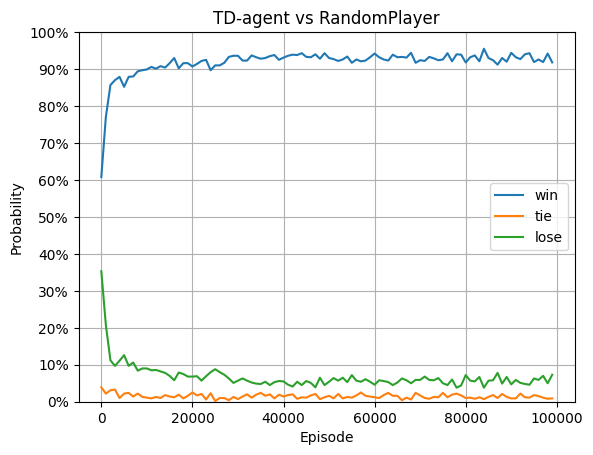

In [67]:
# train a TD-agent against random
win_list_1 = []
tie_list_1 = []
lose_list_1 = []

for _ in tqdm(range(number_of_episodes),colour = 'green'):  # Increase the number of training games as needed
    game.reset()
    result = play_game_TD(TD_agent1, game, player1)
    TD_agent1.decrease_epsilon()
    if _ % freq == 0:
 
        win_prob,tie_prob,lose_prob = evaluate(TD_agent1, player1,game,freq)
        win_list_1.append(win_prob)
        tie_list_1.append(tie_prob)
        lose_list_1.append(lose_prob)
       
    if _ % (20*freq) == 0:
        print(f"Episode {_}")
        print(f"epsilon: {TD_agent1.epsilon}")
        print(f"size of state pair: {len(TD_agent1.V)}")
        print(f"win probability: {win_prob}")

xs = freq*np.arange(len(win_list_1))
plt.plot(xs,win_list_1, label = 'win')
plt.xlabel('Episode')
plt.plot(xs,tie_list_1,label = "tie") 
plt.plot(xs,lose_list_1, label = "lose")
plt.xlabel('Episode')
plt.ylabel('Probability')
plt.ylim(0,1)
plt.yticks(np.arange(0,1.1,0.1))
plt.title('TD-agent vs RandomPlayer')
plt.grid()
plt.legend()
# convert y to percentage
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])
# lose prob
plt.show()

  0%|          | 412/100000 [00:00<01:17, 1291.47it/s]

Episode 0
epsilon: 0.999
size of state pair: 8
win probability: 0.466


 21%|██        | 20847/100000 [00:13<00:43, 1810.23it/s]

Episode 20000
epsilon: 0.1
size of state pair: 6082
win probability: 0.861


 40%|████      | 40474/100000 [00:26<00:38, 1539.23it/s]

Episode 40000
epsilon: 0.1
size of state pair: 6744
win probability: 0.891


 60%|██████    | 60361/100000 [00:40<00:26, 1485.83it/s]

Episode 60000
epsilon: 0.1
size of state pair: 7182
win probability: 0.88


 81%|████████  | 80611/100000 [00:53<00:11, 1752.03it/s]

Episode 80000
epsilon: 0.1
size of state pair: 7570
win probability: 0.904


100%|██████████| 100000/100000 [01:06<00:00, 1510.44it/s]


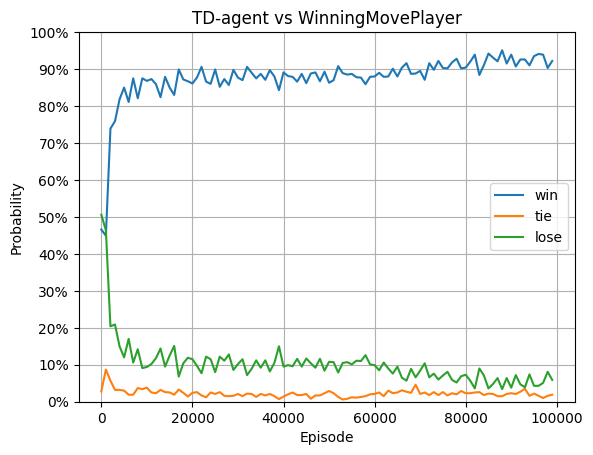

In [68]:
# train a TD-agent against WinningMovePlayer
win_list_2 = []
tie_list_2 = []
lose_list_2 = []

for _ in tqdm(range(number_of_episodes), colour = 'green'):  # Increase the number of training games as needed
    game.reset()
    result = play_game_TD(TD_agent2, game, player2)
    TD_agent2.decrease_epsilon()
    if _ % freq == 0:
 
        win_prob,tie_prob,lose_prob = evaluate(TD_agent2, player2,game,freq)
        win_list_2.append(win_prob)
        tie_list_2.append(tie_prob)
        lose_list_2.append(lose_prob)
       
    if _ % (20*freq) == 0:
        print(f"Episode {_}")
        print(f"epsilon: {TD_agent2.epsilon}")
        print(f"size of state pair: {len(TD_agent2.V)}")
        print(f"win probability: {win_prob}")

xs = freq*np.arange(len(win_list_2))
plt.plot(xs,win_list_2, label = 'win')
plt.xlabel('Episode')
plt.plot(xs,tie_list_2,label = "tie") 
plt.plot(xs,lose_list_2, label = "lose")
plt.xlabel('Episode')
plt.ylabel('Probability')
plt.grid()
plt.ylim(0,1)
plt.yticks(np.arange(0,1.1,0.1))
plt.title('TD-agent vs WinningMovePlayer')
plt.legend()
# convert y to percentage
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])
# lose prob
plt.show()

  0%|          | 289/100000 [00:00<02:15, 734.41it/s]

Episode 0
epsilon: 0.999
size of state pair: 9
win probability: 0.002


 20%|██        | 20445/100000 [00:19<01:10, 1123.45it/s]

Episode 20000
epsilon: 0.1
size of state pair: 6286
win probability: 0.633


 40%|████      | 40376/100000 [00:37<01:00, 989.62it/s] 

Episode 40000
epsilon: 0.1
size of state pair: 6626
win probability: 0.678


 60%|██████    | 60284/100000 [00:56<00:40, 976.21it/s] 

Episode 60000
epsilon: 0.1
size of state pair: 6697
win probability: 0.657


 80%|████████  | 80282/100000 [01:14<00:19, 993.02it/s] 

Episode 80000
epsilon: 0.1
size of state pair: 6747
win probability: 0.644


100%|██████████| 100000/100000 [01:32<00:00, 1079.56it/s]


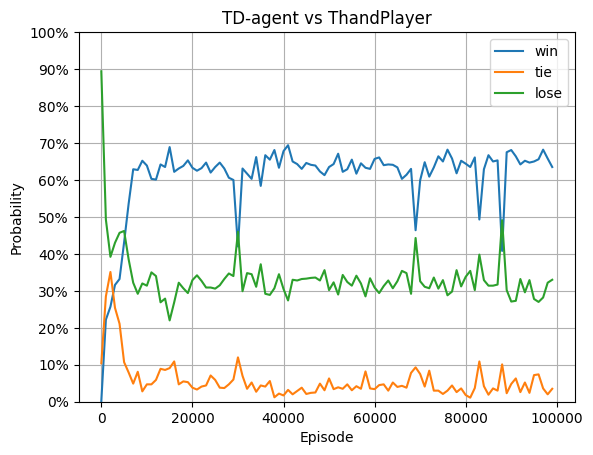

In [69]:
# train a TD-agent against ThandPlayer, don't decay epsilon since it is hard to beat
win_list_3 = []
tie_list_3 = []
lose_list_3 = []

for _ in tqdm(range(number_of_episodes), colour = 'green'):  # Increase the number of training games as needed
    game.reset()
    result = play_game_TD(TD_agent3, game, player3)
    TD_agent3.decrease_epsilon() #
    if _ % freq == 0:
        win_prob,tie_prob,lose_prob = evaluate(TD_agent3, player3,game,freq)
        win_list_3.append(win_prob)
        tie_list_3.append(tie_prob)
        lose_list_3.append(lose_prob)
       
    if _ % (20*freq) == 0:
        print(f"Episode {_}")
        print(f"epsilon: {TD_agent3.epsilon}")
        print(f"size of state pair: {len(TD_agent3.V)}")
        print(f"win probability: {win_prob}")

xs = freq*np.arange(len(win_list_3))
plt.plot(xs,win_list_3, label = 'win')
plt.xlabel('Episode')
plt.plot(xs,tie_list_3,label = "tie") 
plt.plot(xs,lose_list_3, label = "lose")
plt.xlabel('Episode')
plt.ylabel('Probability')
plt.grid()
plt.ylim(0,1)
plt.yticks(np.arange(0,1.1,0.1))
plt.title('TD-agent vs ThandPlayer')
plt.legend()
# convert y to percentage
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])
# lose prob
plt.show()

/var/folders/nm/7d2mnp_x4y1c6q58d9_5h1140000gn/T/ipykernel_31156/2882298669.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])


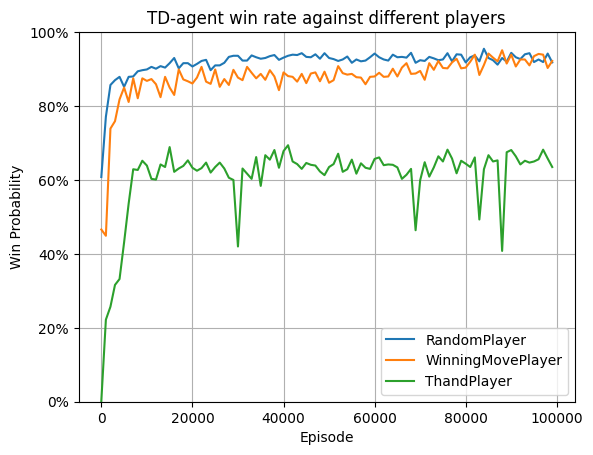

In [70]:
# Plot 3 agents win rate in one graph against episode
plt.plot(xs,win_list_1, label = 'RandomPlayer')
plt.plot(xs,win_list_2, label = 'WinningMovePlayer')
plt.plot(xs,win_list_3, label = 'ThandPlayer')
plt.xlabel('Episode')
plt.ylabel('Win Probability')
plt.ylim(0,1)
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])
plt.grid()
plt.title('TD-agent win rate against different players')
plt.legend()
plt.show()

In [72]:
# Evaluate TDplayer against each other, can only do 1vs2, 2vs3 since letter is fixed
print("TDAgent X (ThandPlayer) vs TDAgent O (WinningMovePlayer):")
evaluate(TD_agent3, TD_agent2, game, num_games=1000,verbose = True,default_epsilon = 0.1)
print("TDAgent O (WinningMovePlayer) vs TDAgent X (RandomPlayer):")
evaluate(TD_agent2, TD_agent1, game, num_games=1000,verbose = True,default_epsilon = 0.1)

TDAgent X (ThandPlayer) vs TDAgent O (WinningMovePlayer):
TDAgent X wins: 102 / 1000, Draws: 8 / 1000, TDAgent O wins: 890 / 1000
TDAgent O (WinningMovePlayer) vs TDAgent X (RandomPlayer):
TDAgent O wins: 809 / 1000, Draws: 35 / 1000, TDAgent X wins: 156 / 1000


(0.809, 0.035, 0.156)

### Evaluate Each TD Agent across different player
We have trained 3 TD agent trained against random player, winningmove player and Thand player, now we will evaluate each of the agent across different player. We find that
- Agent1 and Agent2 have are strong against RandomPlayer and WinningMovePlayer, but they perform very poorly against ThandPlayer
- Agent3, while perform strong against RandomPlayer and WinningMovePlayer, the win rate is slight less than agent1 and agent2. Howeve, it perform much better when facing ThandPlayer.

In [74]:
# evaluate TDagent against player random, winningmoveplayer, thandplayer
player1 = RandomPlayer('O')
player2 = WinningMovePlayer('O')
player3 = ThandPlayer('O')
print("--------------------------------")
print("TDAgent X (Trained against Random) vs different player:")
evaluate(TD_agent1, player1, game, num_games=1000,verbose = True,default_epsilon = 0)
evaluate(TD_agent1, player2, game, num_games=1000,verbose = True,default_epsilon = 0)
evaluate(TD_agent1, player3, game, num_games=1000,verbose = True,default_epsilon = 0)
print("--------------------------------")
print("TDAgent O (Trained against WinningMove) vs different player:")
player1 = RandomPlayer('X')
player2 = WinningMovePlayer('X')
player3 = ThandPlayer('X')
evaluate(TD_agent2, player1, game, num_games=1000,verbose = True,default_epsilon = 0)
evaluate(TD_agent2, player2, game, num_games=1000,verbose = True,default_epsilon = 0)
evaluate(TD_agent2, player3, game, num_games=1000,verbose = True,default_epsilon = 0)
print("--------------------------------")
print("TDAgent X (Trained against ThandPlayer) vs different player:")
player1 = RandomPlayer('O')
player2 = WinningMovePlayer('O')
player3 = ThandPlayer('O')
evaluate(TD_agent3, player1, game, num_games=1000,verbose = True,default_epsilon = 0)
evaluate(TD_agent3, player2, game, num_games=1000,verbose = True,default_epsilon = 0)
evaluate(TD_agent3, player3, game, num_games=1000,verbose = True,default_epsilon = 0)



--------------------------------
TDAgent X (Trained against Random) vs different player:
TDAgent X wins: 936 / 1000, Draws: 15 / 1000, RandomPlayer with O wins: 49 / 1000
TDAgent X wins: 875 / 1000, Draws: 7 / 1000, WinningMovePlayer with O wins: 118 / 1000
TDAgent X wins: 460 / 1000, Draws: 90 / 1000, ThandPlayer with O wins: 450 / 1000
--------------------------------
TDAgent O (Trained against WinningMove) vs different player:
TDAgent O wins: 949 / 1000, Draws: 28 / 1000, RandomPlayer with X wins: 23 / 1000
TDAgent O wins: 937 / 1000, Draws: 17 / 1000, WinningMovePlayer with X wins: 46 / 1000
TDAgent O wins: 281 / 1000, Draws: 357 / 1000, ThandPlayer with X wins: 362 / 1000
--------------------------------
TDAgent X (Trained against ThandPlayer) vs different player:
TDAgent X wins: 817 / 1000, Draws: 36 / 1000, RandomPlayer with O wins: 147 / 1000
TDAgent X wins: 755 / 1000, Draws: 16 / 1000, WinningMovePlayer with O wins: 229 / 1000
TDAgent X wins: 628 / 1000, Draws: 49 / 1000, Tha

(0.628, 0.049, 0.323)

### Conclusion
- size of state pair: Random < WinningMove < Thand
- WinningMove learning curve takes a bit longer than Random learning curve to converge, also the curve is more wiggly
- Thand Learning curve takes much longer to converge than the other two
- Random and WinningMove achieve roughly 90% win rate after 500000 episodes, while ThandPlayer curve is around 65%
- It is much harder and longer to learn against ThandPlayer since ThandPlayer can always block win, the agent has to think 2 step ahead to have two winningmove simultaneously in order to win.

In [194]:
# explicitly demonstrate a game
TD_agent2.epsilon = 0
TD_agent3.epsilon = 0
def demonstrate_game(agent1, agent2, game):
    current_player = np.random.choice([agent1, agent2])
    while True:
        if current_player == agent1:
            action = agent1.choose_action(game)
            game.make_move(action,agent1.letter)
            
        else:
            action = agent2.choose_action(game)
            game.make_move(action,agent2.letter)
        game.print_board()
        print("-------------")
        if game.gameover():
            if game.current_winner:
                print(f"{agent1 if agent1.letter == game.current_winner else agent2} wins")
            else:
                print("It's a tie")
            break
        current_player = agent2 if current_player == agent1 else agent1

game = TicTacToe()
demonstrate_game(TD_agent2, TD_agent3, game)

|   |   |   |
|   |   |   |
|   |   | X |
-------------
|   |   |   |
|   | O |   |
|   |   | X |
-------------
|   | X |   |
|   | O |   |
|   |   | X |
-------------
|   | X | O |
|   | O |   |
|   |   | X |
-------------
|   | X | O |
| X | O |   |
|   |   | X |
-------------
|   | X | O |
| X | O |   |
| O |   | X |
-------------
TDAgent O wins


In [195]:
# explicitly demonstrate a game
game = TicTacToe()
demonstrate_game(WinningMovePlayer('X'), ThandPlayer('O'), game)

|   | O |   |
|   |   |   |
|   |   |   |
-------------
|   | O |   |
|   |   |   |
|   | X |   |
-------------
|   | O |   |
|   |   |   |
| O | X |   |
-------------
|   | O |   |
|   | X |   |
| O | X |   |
-------------
|   | O |   |
| O | X |   |
| O | X |   |
-------------
| X | O |   |
| O | X |   |
| O | X |   |
-------------
| X | O |   |
| O | X |   |
| O | X | O |
-------------
| X | O | X |
| O | X |   |
| O | X | O |
-------------
| X | O | X |
| O | X | O |
| O | X | O |
-------------
It's a tie


In [196]:
# We show that ThandPlayer is indeed very strong
game.reset()
player1 = RandomPlayer('O')
player2 = WinningMovePlayer('O')
player3 = ThandPlayer('X')
print("ThandPlayer vs RandomPlayer:")
w,t,l = evaluate(player3, player1, game, 1000,verbose = True)
print("ThandPlayer vs WinningMovePlayer:")
w,t,l = evaluate(player3, player2, game, 1000,verbose = True)
print("WinningMovePlayer vs RandomPlayer:")
player2 = WinningMovePlayer('X') # change the letter
w,t,l = evaluate(player2, player1, game, 1000,verbose = True)

ThandPlayer vs RandomPlayer:
ThandPlayer with X wins: 782 / 1000, Draws: 175 / 1000, RandomPlayer with O wins: 43 / 1000
ThandPlayer vs WinningMovePlayer:
ThandPlayer with X wins: 771 / 1000, Draws: 138 / 1000, WinningMovePlayer with O wins: 91 / 1000
WinningMovePlayer vs RandomPlayer:
WinningMovePlayer with X wins: 657 / 1000, Draws: 79 / 1000, RandomPlayer with O wins: 264 / 1000


## Train and Evaluate Q-player

  0%|          | 601/200000 [00:00<00:33, 6004.61it/s]

Episode 0
epsilon: 0.1998
size of state action pair: 4


 11%|█         | 21001/200000 [00:02<00:19, 9054.18it/s]

Episode 20000
epsilon: 0.1
size of state action pair: 9367


 21%|██        | 41001/200000 [00:04<00:18, 8672.73it/s]

Episode 40000
epsilon: 0.1
size of state action pair: 10815


 31%|███       | 61001/200000 [00:07<00:15, 8788.14it/s]

Episode 60000
epsilon: 0.1
size of state action pair: 11716


 41%|████      | 81001/200000 [00:09<00:12, 9340.89it/s]

Episode 80000
epsilon: 0.1
size of state action pair: 12381


 51%|█████     | 101001/200000 [00:11<00:11, 8812.80it/s]

Episode 100000
epsilon: 0.1
size of state action pair: 12804


 61%|██████    | 121001/200000 [00:13<00:08, 9027.39it/s]

Episode 120000
epsilon: 0.1
size of state action pair: 13102


 71%|███████   | 141001/200000 [00:15<00:06, 8846.23it/s]

Episode 140000
epsilon: 0.1
size of state action pair: 13337


 81%|████████  | 161001/200000 [00:18<00:04, 8989.04it/s]

Episode 160000
epsilon: 0.1
size of state action pair: 13537


 91%|█████████ | 181001/200000 [00:20<00:02, 8678.32it/s]

Episode 180000
epsilon: 0.1
size of state action pair: 13658


100%|██████████| 200000/200000 [00:22<00:00, 8915.73it/s]
/var/folders/nm/7d2mnp_x4y1c6q58d9_5h1140000gn/T/ipykernel_10807/1098107781.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])


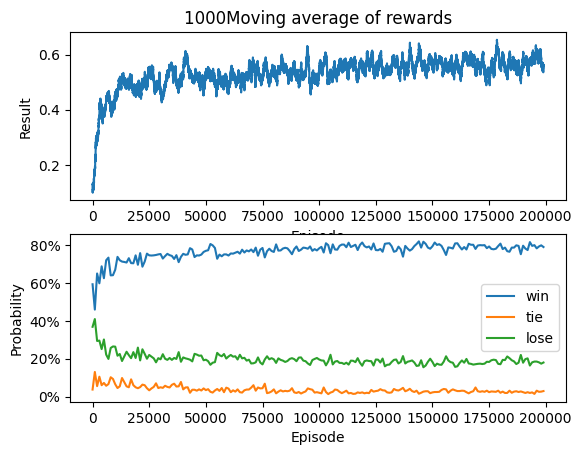

In [197]:
# train a Q-agent against RandomPlayer
results = []
agent1 = RLAgent('X')
player1 = RandomPlayer('O')
player2 = WinningMovePlayer('O')
player3 = ThandPlayer('O')
number_of_episodes = 200000
win_list = []
tie_list = []
lose_list = []
freq = 1000
for _ in tqdm(range(number_of_episodes),colour = 'green'):  # Increase the number of training games as needed
    game.reset()
    result = play_game(agent1, game, player1)
    agent1.decrease_epsilon()
    results.append(result) # append the total reward after each episode
    if _ % freq == 0:
 
        win_prob,tie_prob,lose_prob = evaluate(agent1, player1,game,freq)
        win_list.append(win_prob)
        tie_list.append(tie_prob)
        lose_list.append(lose_prob)
       
    if _ % (20*freq) == 0:
        print(f"Episode {_}")
        print(f"epsilon: {agent1.epsilon}")
        print(f"size of state action pair: {sum(len(values) for values in agent1.Q.values())}")


results = moving_average(results, freq)
plt.subplot(2, 1, 1)
plt.plot(results)
plt.xlabel('Episode')
plt.ylabel('Result')
plt.title(f'{freq}Moving average of rewards')
plt.subplot(2, 1, 2) # plot win prob
xs = freq*np.arange(len(win_list))
plt.plot(xs,win_list, label = 'win')
plt.xlabel('Episode')
plt.plot(xs,tie_list,label = "tie") 
plt.plot(xs,lose_list, label = "lose")
plt.xlabel('Episode')
plt.ylabel('Probability')
plt.legend()
# convert y to percentage
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])
# lose prob
plt.show()

  1%|          | 332/50000 [00:00<00:43, 1132.12it/s]

Episode 0
epsilon: 0.1998
length of Q:3
size of state action pair: 3


 41%|████      | 20341/50000 [00:12<00:17, 1741.59it/s]

Episode 20000
epsilon: 0.1
length of Q:2216
size of state action pair: 6875


 81%|████████  | 40346/50000 [00:23<00:05, 1775.17it/s]

Episode 40000
epsilon: 0.1
length of Q:2332
size of state action pair: 7639


100%|██████████| 50000/50000 [00:29<00:00, 1719.90it/s]
/var/folders/nm/7d2mnp_x4y1c6q58d9_5h1140000gn/T/ipykernel_10807/3411444636.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])


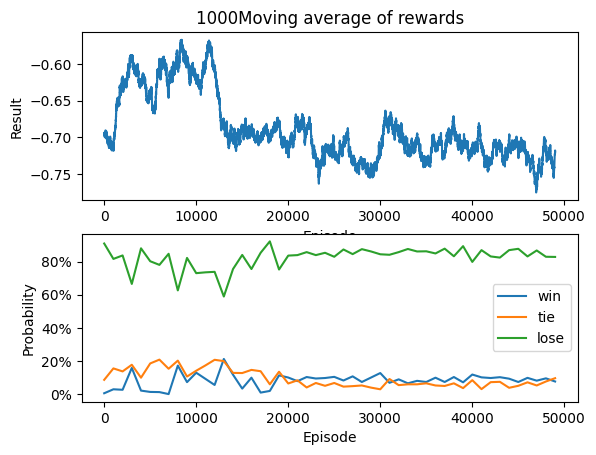

In [198]:
# Train another Q-learning agent called agent2 against ThandPlayer
results = []
agent2 = RLAgent('O')
player3 = ThandPlayer('X')
number_of_episodes = 50000
win_list = []
tie_list = []
lose_list = []
freq = 1000
for _ in tqdm(range(number_of_episodes)):  # Increase the number of training games as needed
    game.reset()
    result = play_game(agent2, game, player3)
    agent2.decrease_epsilon()
    results.append(result) # append the total reward after each episode
    if _ % freq == 0:
        win_prob,tie_prob,lose_prob = evaluate(agent2, player3,game,freq)
        win_list.append(win_prob)
        tie_list.append(tie_prob)
        lose_list.append(lose_prob)
    if _ % (20*freq) == 0:
        print(f"Episode {_}")
        print(f"epsilon: {agent2.epsilon}")
        print(f"length of Q:{len(agent2.Q)}")
        print(f"size of state action pair: {sum(len(values) for values in agent2.Q.values())}")

results = moving_average(results, freq)
plt.subplot(2, 1, 1)
plt.plot(results)
plt.xlabel('Episode')
plt.ylabel('Result')
plt.title(f'{freq}Moving average of rewards')
plt.subplot(2, 1, 2) # plot win prob
xs = freq*np.arange(len(win_list))
plt.plot(xs,win_list, label = 'win')
plt.xlabel('Episode')
plt.plot(xs,tie_list,label = "tie") 
plt.plot(xs,lose_list, label = "lose")
plt.xlabel('Episode')
plt.ylabel('Probability')
plt.legend()
# convert y to percentage
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])
# lose prob
plt.show()

## Play with Human

In [199]:
def play_with_human(agent, game, human):
    current_player = np.random.choice([agent, human])
    agent_char = agent.letter
    human_char = human.letter
    #game.print_board()
    while True:
        state = agent.get_state(game)
        if current_player == agent:
            action = agent.choose_action(game)
            game.make_move(action, agent_char)
            game.print_board()
        else:
            action = human.choose_action(game)
            game.make_move(action, human_char)
            #game.print_board()
        if game.current_winner:
            if game.current_winner == agent_char:
                print("Agent wins!")
            else:
                print("You  wins!")
            break
        if len(game.available_moves()) == 0:
            print("It's a draw!")
            break
        current_player = human if current_player == agent else agent # switch player

In [200]:
# Choose an agent with charactor 'X' to play with human with charactor 'O'
print(TD_agent3.letter) # should return 'X
game = TicTacToe()
play_with_human(TD_agent3, game, HumanPlayer('O'))

X
|   | O |   |
|   |   |   |
|   |   | X |
| X | O | O |
|   |   |   |
|   |   | X |
| X | O | O |
|   | O |   |
|   | X | X |
You  wins!
